##### IMPORT LIBRARY

In [8]:
# IMPORT LIBRARY
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2  # opencv lib
%matplotlib inline

##### Read Image

In [2]:
from sklearn.feature_extraction import img_to_graph


img_path = "car1.jpeg"
car1 = mpimg.imread(img_path)

c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
car1.shape

(168, 300, 3)

In [4]:
type(car1)

numpy.ndarray

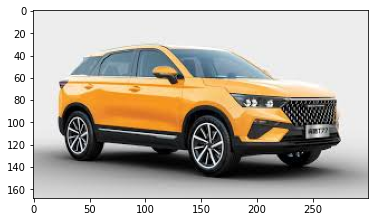

In [5]:
plt.imshow(car1)

In [6]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [7]:
car1_cv2 = cv2.imread(img_path)

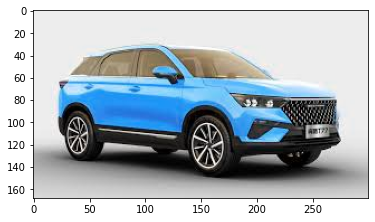

In [9]:
plt.imshow(car1_cv2)
plt.show()

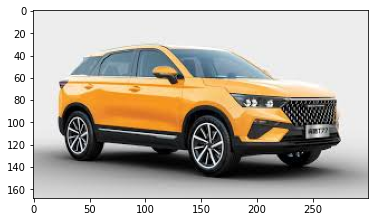

In [10]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

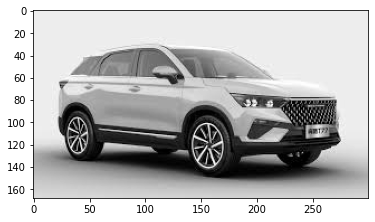

In [12]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [13]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [14]:
car1_cv2_BGR_GRAY.min(),car1_cv2_BGR_GRAY.max()

(0, 255)

#### UNDERSTANDING COMPOSITION OF COLORED IMAGES

In [23]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
    # Splitting The RGB Components
    B, G, R = cv2.split(imgArray)
    
    Z = np.zeros(B.shape, dtype=B.dtype) 
    
    fig, ax = plt.subplots(2,2, figsize=figsize)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    ax[0,0].set_title("original image")
    ax[0,0].imshow(cv2.merge((R, G, B)))
    
    ax[0,1].set_title("RED CHANNEL IMAGE")
    ax[0,1].imshow(cv2.merge((R, Z, Z)))
    
    ax[1,0].set_title("GREEN CHANNEL IMAGE")
    ax[1,0].imshow(cv2.merge((Z, G, Z)))
    
    ax[1,1].set_title("BLUE CHANNEL IMAGE")
    ax[1,1].imshow(cv2.merge((Z, Z, B)))

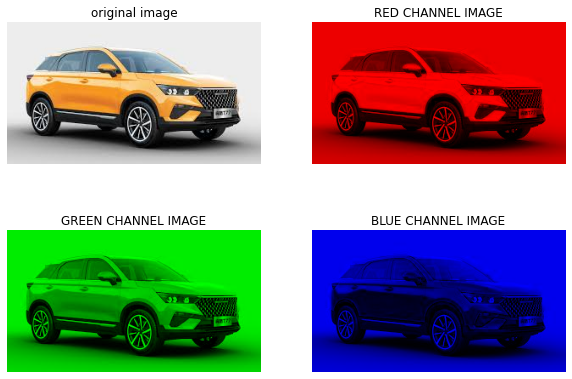

In [24]:
viusalize_RGB_channel(imgArray=car1_cv2)

#### RANDOM IMAGE ARRAY

(6, 6, 3)

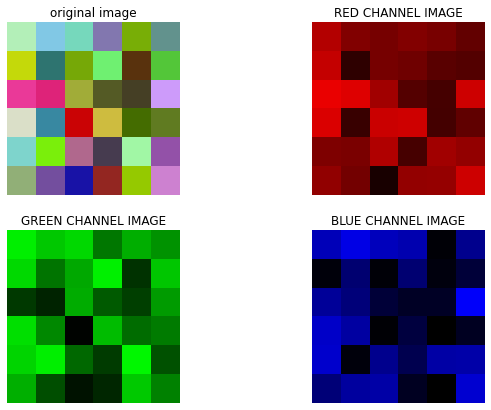

In [25]:
random_colored_img = np.random.randint(0,255, (6,6,3))
display(random_colored_img.shape)
viusalize_RGB_channel(random_colored_img)

#### UNDERSTANDING FILTERS

In [27]:
sobel = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]]
)
display("highlight horizontal edge : ",sobel)

'highlight horizontal edge : '

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [28]:
display("highlight Vertical edge : ",sobel.T)

'highlight Vertical edge : '

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [29]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

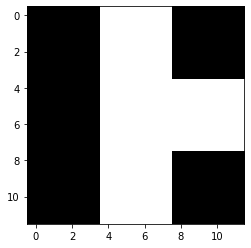

In [31]:
plt.imshow(example1,cmap="gray")

#### FILTER APPLY

In [35]:
def simple_conv(imgFilter=None, picture=None):
    p_row, p_col = picture.shape
    
    k = imgFilter.shape[0] # K = 3
    
    temp = list()
    
    stride = 1
    
    final_rows = (p_row - k)//stride + 1
    final_cols = (p_col - k)//stride + 1
    
    for v_stride in range(final_rows):
        for h_stride in range(final_cols):
            target_area_of_pic = picture[v_stride: v_stride+k, h_stride:h_stride+k]
            z = sum(sum(imgFilter * target_area_of_pic))
            temp.append(z)
            
    resultant_image = np.array(temp).reshape(final_rows, final_cols)
    return resultant_image

In [36]:
display(example1)
display(sobel.T)


array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [37]:
from unittest import result


k = 3
stride = 1
result = simple_conv(imgFilter=sobel.T, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

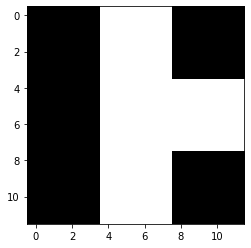

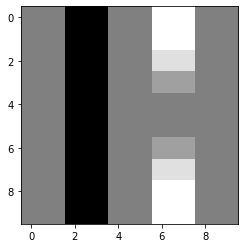

In [40]:
plt.imshow(example1,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

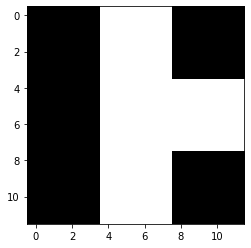

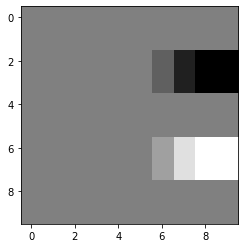

In [43]:
result = simple_conv(sobel, example1)
plt.imshow(example1,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

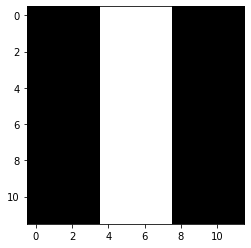

In [44]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

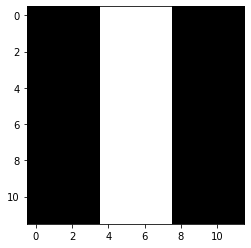

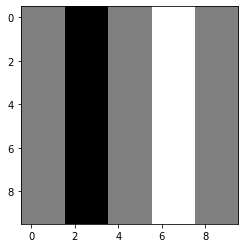

In [46]:
result = simple_conv(sobel.T, example2)
plt.imshow(example2,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

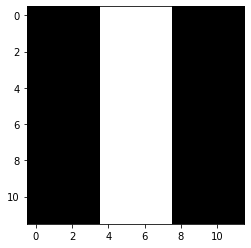

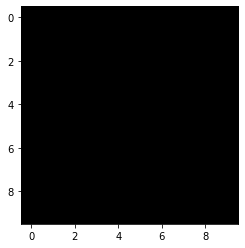

In [47]:
result = simple_conv(sobel, example2)
plt.imshow(example2,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

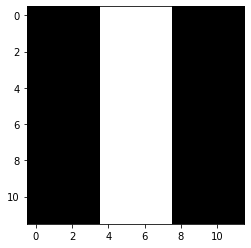

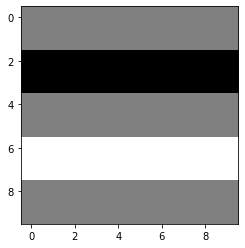

In [49]:
result = simple_conv(sobel, example2.T)
plt.imshow(example2,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

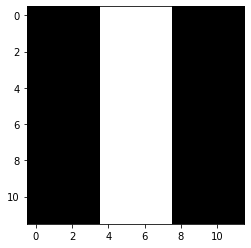

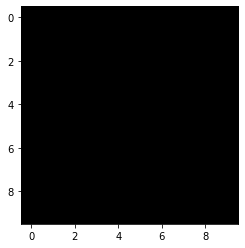

In [51]:
result = simple_conv(sobel.T, example2.T)
plt.imshow(example2,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()

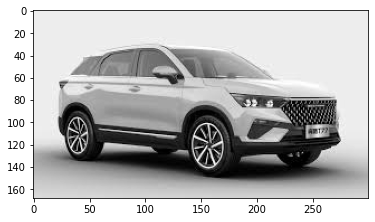

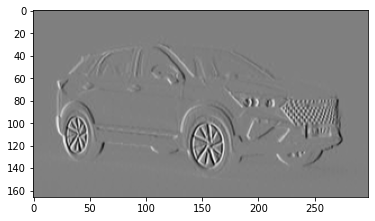

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [54]:
result = simple_conv(sobel.T, car1_cv2_BGR_GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()
sobel.T

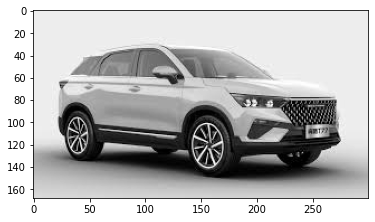

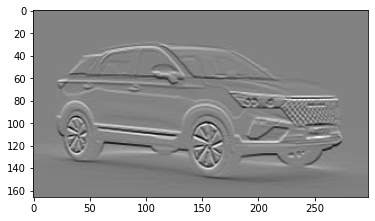

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [55]:
result = simple_conv(sobel, car1_cv2_BGR_GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()
sobel

In [57]:
random_sobel = np.random.randn(3,3)
random_sobel

array([[-0.50119119, -0.07993908,  0.81823151],
       [-2.10181532, -0.35012064, -0.00732296],
       [ 2.77376724,  2.31445821, -0.64838083]])

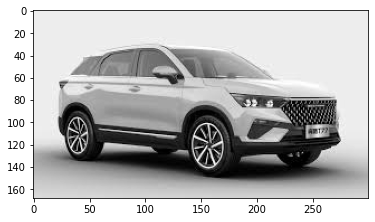

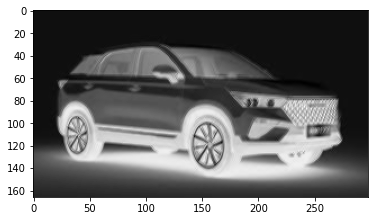

array([[-0.53465627, -0.90559221, -0.18233069],
       [-0.19692093, -1.79259007,  0.16102196],
       [-1.62500053,  0.81222597, -1.124623  ]])

In [60]:
random_sobel = np.random.randn(3,3)

result = simple_conv(random_sobel, car1_cv2_BGR_GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")
plt.show()
plt.imshow(result,cmap="gray")
plt.show()
random_sobel